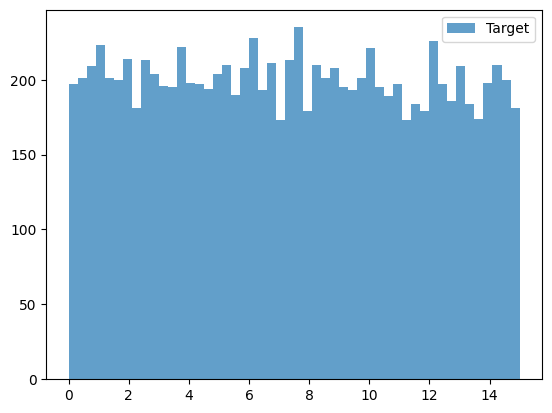

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def generate_trimodal_data(n_samples=10000, noise_level=0.3):
    # Set seed for reproducibility
    np.random.seed(42)
    
    # 1. Generate X uniformly between 0 and 15
    X = np.random.uniform(0, 15, n_samples)
    
    # 2. Define the Ground Truth function (Three Peaks)
    # This is the "hidden" function f(x) the students try to learn
    def ground_truth(x):
        return (3 * np.exp(-(x - 3)**2) + 
                2 * np.exp(-(x - 7.5)**2) + 
                3 * np.exp(-(x - 12)**2))
    
    # 3. Generate Target y = f(x) + epsilon
    y_true = ground_truth(X)
    noise = np.random.normal(0, noise_level, n_samples)
    y = y_true + noise
    
    # Return as a DataFrame and the ground truth function (for plotting later)
    df = pd.DataFrame({'feature': X, 'target': y})
    return df, ground_truth

# Usage
df, gt_func = generate_trimodal_data()

# plt.hist(df['feature'], bins=30, alpha=0.7, label='Feature')
plt.hist(df['feature'], bins=50, alpha=0.7, label='Target')
plt.legend()
plt.show()

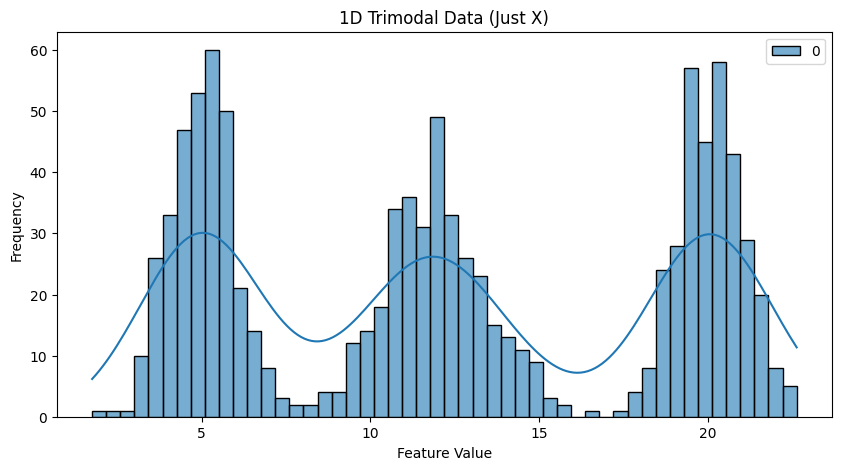

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def generate_1d_trimodal(n_samples=1000):
    np.random.seed(42)
    
    # Define sample sizes for the three clusters (peaks)
    n1, n2, n3 = 330, 340, 330
    
    # Generate 3 distinct distributions (Modes)
    # Mode 1: Mean=5,  Std=1.0
    # Mode 2: Mean=12, Std=1.5 (Slightly fatter)
    # Mode 3: Mean=20, Std=1.0
    
    x1 = np.random.normal(5, 1.0, n1)
    x2 = np.random.normal(12, 1.5, n2)
    x3 = np.random.normal(20, 1.0, n3)
    
    # Concatenate into a single feature array X
    X = np.concatenate([x1, x2, x3])
    
    # Shuffle the data so it's not ordered by cluster
    np.random.shuffle(X)
    
    # Reshape for sklearn: (1000, 1)
    return X.reshape(-1, 1)

# Generate the data
X = generate_1d_trimodal()

# --- Visualization for you to check ---
plt.figure(figsize=(10, 5))
# Plot Histogram/Density to show the "Trimodal" nature
sns.histplot(X, bins=50, kde=True, color='purple', alpha=0.6)
plt.title("1D Trimodal Data (Just X)")
plt.xlabel("Feature Value")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# df = pd.read_csv('trimodal_dataset.csv')
# df['X1'] = X
# df["X2"] = df["feature"]

# df[["X1", "X2", "target"]].to_csv('homework_1_data.csv', index=False)

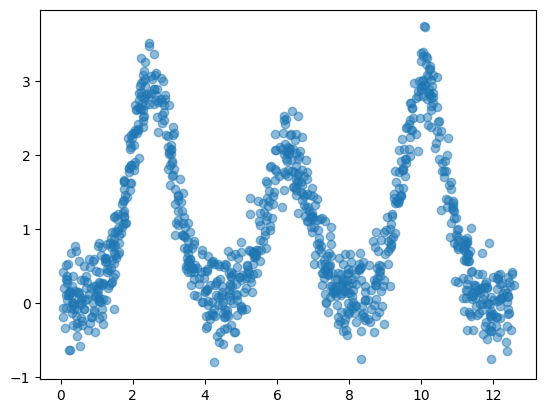

In [ ]:
def generate_sine_data(n_samples=1000):
    np.random.seed(42)
    
    # 1. Generate X: Uniformly distributed over 2 cycles (0 to 4pi)
    X = np.random.uniform(0, 4 * np.pi, n_samples)
    
    # 2. Define True Parameters
    true_intercept = 5.2
    true_slope = 3.5
    
    # 3. Generate Y: Linear relationship with sin(X)
    # Y = beta_0 + beta_1 * sin(X) + error
    noise = np.random.normal(0, 0.5, n_samples)
    Y = true_intercept + (true_slope * np.sin(X)) + noise
    
    return pd.DataFrame({'feature': X, 'target': Y})


df = pd.read_csv('homework_1_data.csv')

# df1 = generate_sine_data()

# df["y"] = df1["target"]
# df["X3"] = df1["feature"]

# df[["X1", "X2", "X3", "target", "y"]].to_csv('homework_1_data.csv', index=False)

plt.scatter(df['X3'], df['target'], alpha=0.5)


In [24]:
df.head()

,X1,X2,X3,target,y
0,10.305440,5.618102,4.706610,0.114412,1.788909
1,12.921250,14.260715,11.947028,-0.382510,2.500579
2,4.142842,10.979909,9.198507,1.173814,6.175306
3,12.113707,8.979877,7.522964,0.407329,8.815286
4,5.738467,2.340280,1.960588,2.109283,8.717354


(array([ 1.,  1.,  1., 10., 26., 33., 47., 53., 60., 50., 21., 14.,  8.,
         3.,  2.,  2.,  4.,  4., 12., 14., 18., 34., 36., 31., 49., 33.,
        26., 23., 15., 13., 11.,  9.,  3.,  2.,  0.,  1.,  0.,  1.,  4.,
         8., 24., 28., 57., 45., 58., 43., 29., 20.,  8.,  5.]),
 array([ 1.75873266,  2.17620565,  2.59367864,  3.01115162,  3.42862461,
         3.8460976 ,  4.26357059,  4.68104358,  5.09851656,  5.51598955,
         5.93346254,  6.35093553,  6.76840852,  7.18588151,  7.60335449,
         8.02082748,  8.43830047,  8.85577346,  9.27324645,  9.69071943,
        10.10819242, 10.52566541, 10.9431384 , 11.36061139, 11.77808437,
        12.19555736, 12.61303035, 13.03050334, 13.44797633, 13.86544931,
        14.2829223 , 14.70039529, 15.11786828, 15.53534127, 15.95281426,
        16.37028724, 16.78776023, 17.20523322, 17.62270621, 18.0401792 ,
        18.45765218, 18.87512517, 19.29259816, 19.71007115, 20.12754414,
        20.54501712, 20.96249011, 21.3799631 , 21.79743609,

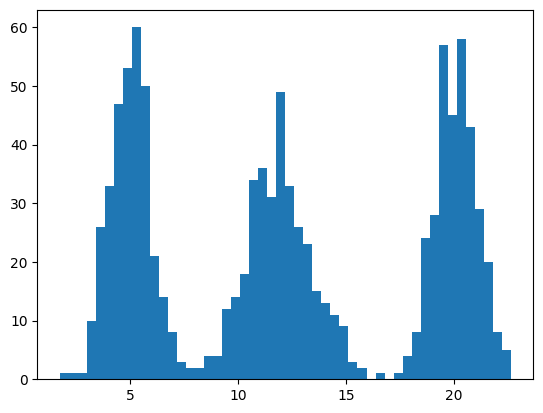

In [13]:
plt.hist(X, bins=50)